In [158]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
from plotnine import ggplot, aes, geom_point, geom_density

In [131]:
measures = ['euclidean', 'dtw-python-distance', 'dtw-python-normalizedDistance', 'lcss_similarity']

Default

In [192]:
distance_df = pd.read_csv("SimilaritiesData/comparison_distance_all.csv")
distance_df['same_functions'] = distance_df['function1'] == distance_df['function2']
distance_df.drop(distance_df[distance_df.udf1 == distance_df.udf2].index, inplace=True)

distance_df

,id,dataType,function1,snapshot1,function2,snapshot2,euclidean,dtw-python-distance,dtw-python-normalizedDistance,lcss_similarity,is_normalized,is_smoothed,size1,size2,udf1,udf2,same_functions
6,6,CPU,aggregation,64,aggregation,163,1036.752714,3987.1,0.158908,0.930512,0,1,1,1,avgNetProfitGroupedBySoldDate,avgWholeSaleCostGroupedBySoldDate,True
7,7,RAM,aggregation,64,aggregation,163,140.768107,608.3,0.158908,0.900731,0,1,1,1,avgNetProfitGroupedBySoldDate,avgWholeSaleCostGroupedBySoldDate,True
8,8,CPU,aggregation,64,aggregation,175,1314.719476,4386.6,0.290152,0.924242,0,1,1,1,avgNetProfitGroupedBySoldDate,avgWholeSaleCostGroupedBySoldDate,True
9,9,RAM,aggregation,64,aggregation,175,136.559145,1110.7,0.290152,0.633229,0,1,1,1,avgNetProfitGroupedBySoldDate,avgWholeSaleCostGroupedBySoldDate,True
10,10,CPU,aggregation,64,aggregation,178,1056.813172,4208.6,0.156635,0.934692,0,1,1,1,avgNetProfitGroupedBySoldDate,avgWholeSaleCostGroupedBySoldDate,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24145,937,RAM,aggregation,493,filtration-join,7818,199.707161,9.1,0.002377,0.841693,0,1,1,2,countWholeSaleCostGroupedBySoldDate,filterStoreSalesWhereYearAfter2000,False
24146,938,CPU,aggregation,493,filtration-join,7822,1037.867718,4004.5,0.024869,0.941484,0,1,1,2,countWholeSaleCostGroupedBySoldDate,filterStoreSalesWhereYearAfter2000,False
24147,939,RAM,aggregation,493,filtration-join,7822,186.770287,95.2,0.024869,0.861546,0,1,1,2,countWholeSaleCostGroupedBySoldDate,filterStoreSalesWhereYearAfter2000,False
24148,940,CPU,aggregation,493,filtration-join,7828,1353.894549,4212.6,0.011338,0.938871,0,1,1,2,countWholeSaleCostGroupedBySoldDate,filterStoreSalesWhereYearAfter2000,False


Filters

In [193]:
filterCPU = distance_df["dataType"]=="CPU"
filterRAM = distance_df["dataType"]=="RAM"
filterDifferent = distance_df["function1"]!=distance_df["function2"]
filterSame = distance_df["function1"]==distance_df["function2"]
filterDifferentSize = distance_df["size1"]!=distance_df["size2"]
filterSameSize = distance_df["size1"]==distance_df["size2"]

filterAggregation1 = distance_df["function1"]=="aggregation"
filterAggregation2 = distance_df["function2"]=="aggregation"
filterFiltration1 = distance_df["function1"]=="filtration"
filterFiltration2 = distance_df["function2"]=="filtration"
filterFiltrationAggregation1 = distance_df["function1"]=="filtration-aggregation"
filterFiltrationAggregation2 = distance_df["function2"]=="filtration-aggregation"
filterFiltrationAggregationJoin1 = distance_df["function1"]=="filtration-aggregation-join"
filterFiltrationAggregationJoin2 = distance_df["function2"]=="filtration-aggregation-join"
filterFiltrationJoin1 = distance_df["function1"]=="filtration-join"
filterFiltrationJoin2 = distance_df["function2"]=="filtration-join"

Summary

In [194]:
#CPU
distance_df_cpu = distance_df[filterCPU]
distance_df_cpu[measures].describe()

,euclidean,dtw-python-distance,dtw-python-normalizedDistance,lcss_similarity
count,11958.000000,11958.000000,11958.000000,11958.000000
mean,1184.917972,5168.279788,0.177936,0.909247
std,173.703782,979.065932,0.200956,0.021106
min,625.052318,3203.900000,0.000496,0.850052
25%,1057.699778,4449.800000,0.039943,0.893417
50%,1160.772006,4927.400000,0.102377,0.907001
75%,1297.900107,5800.625000,0.259966,0.929467
max,2129.802690,13559.600000,3.366562,0.948276


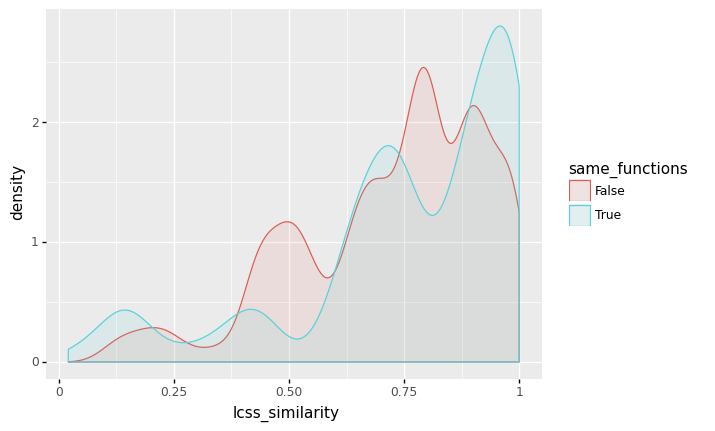

<ggplot: (116948855071)>

In [196]:
distance_df_ram = distance_df[filterRAM & filterAggregation1 & filterSameSize]
(ggplot(distance_df_ram, aes(x='lcss_similarity', color='same_functions', fill='same_functions'))
 + geom_density(alpha=0.1)
)

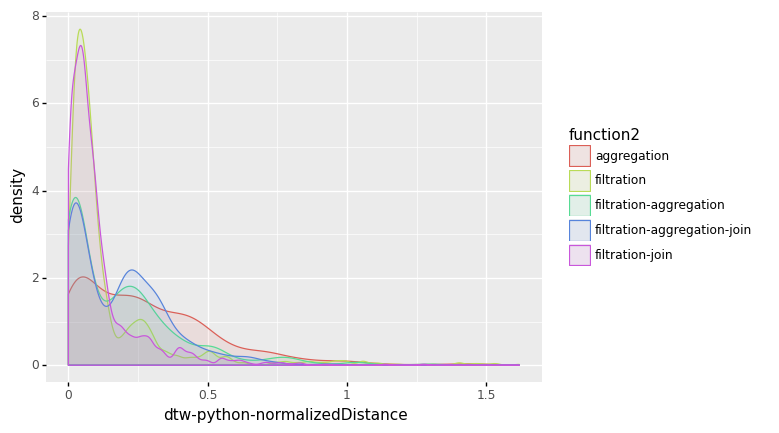

<ggplot: (116786291267)>

In [200]:
(ggplot(distance_df_ram, aes(x='dtw-python-normalizedDistance', color='function2', fill='function2'))
 + geom_density(alpha=0.1)
)

In [109]:
#only matching functions
distance_df_cpu = distance_df[filterCPU & filterSame]
distance_df_cpu[measures].describe()

,euclidean,dtw-python-distance,dtw-python-normalizedDistance,dtaidistance,lcss_similarity
count,22678.000000,22678.000000,22678.000000,22678.000000,22678.000000
mean,677.496207,1947.745352,2.207688,173.817829,0.736846
std,339.626269,1472.898202,3.155307,160.860946,0.116163
min,0.000000,0.000000,0.000000,0.000000,0.441341
25%,387.195267,1219.010000,0.992176,115.863825,0.625000
50%,714.165865,1738.185000,1.579870,152.050716,0.772169
75%,889.616784,2277.850000,2.841355,193.483885,0.839058
max,2164.289940,16820.560000,39.631912,1662.334686,1.000000


In [80]:
#only not matching functions
distance_df_cpu = distance_df[filterCPU & filterDifferent]
distance_df_cpu[measures].describe()

,euclidean,dtw-python-distance,dtw-python-normalizedDistance,dtaidistance,lcss_similarity
count,36750.000000,36750.000000,36750.000000,36750.000000,36750.000000
mean,924.795093,3554.777022,2.156201,368.316749,0.773316
std,218.281441,1604.752456,1.319925,182.422764,0.061851
min,112.347397,282.310000,0.207887,86.979872,0.549618
25%,780.255771,2917.822500,1.334019,257.934879,0.734096
50%,888.071460,3461.280000,1.848049,363.934544,0.775457
75%,1035.168635,3931.525000,2.781145,442.876429,0.822604
max,2162.191508,20197.080000,20.282467,1903.496999,0.986745


In [88]:
#only same functions different size
distance_df_cpu = distance_df[filterCPU & filterSame & filterDifferentSize]
distance_df_cpu[measures].describe()

,euclidean,dtw-python-distance,dtw-python-normalizedDistance,dtaidistance,lcss_similarity
count,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000
mean,703.841687,2028.831773,2.046773,176.821412,0.742104
std,333.142710,1429.626032,2.748206,153.424602,0.112333
min,83.514557,653.660000,0.464462,55.071473,0.452941
25%,410.169953,1246.850000,0.936212,118.454040,0.630841
50%,749.365862,1873.040000,1.255219,155.387172,0.804759
75%,908.837468,2385.260000,2.750199,198.026874,0.843220
max,2164.289940,16820.560000,38.410882,1662.334686,0.905660


In [89]:
#only same functions same size
distance_df_cpu = distance_df[filterCPU & filterSame & filterSameSize]
distance_df_cpu[measures].describe()

,euclidean,dtw-python-distance,dtw-python-normalizedDistance,dtaidistance,lcss_similarity
count,11517.000000,11517.000000,11517.000000,11517.000000,11517.000000
mean,651.965088,1869.165380,2.363629,170.907089,0.731749
std,343.887381,1509.564726,3.498063,167.708560,0.119542
min,0.000000,0.000000,0.000000,0.000000,0.441341
25%,362.078350,1191.650000,1.103671,113.652951,0.619512
50%,673.399588,1644.640000,1.761763,148.891497,0.753650
75%,866.774843,2159.190000,2.923174,189.657003,0.833167
max,2146.249288,15922.090000,39.631912,1632.429409,1.000000


In [65]:
#RAM
distance_df_cpu = distance_df[filterRAM]
distance_df_cpu[measures].describe()

,euclidean,dtw-python-distance,dtw-python-normalizedDistance,dtaidistance,lcss_similarity
count,59428.000000,59428.000000,59428.000000,59428.000000,59428.000000
mean,216.196187,2978.516199,1.625749,101.148849,0.360699
std,112.192175,2239.956072,0.862507,50.302894,0.298753
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,126.047373,1276.667500,1.042301,63.988297,0.110891
50%,227.017886,2676.235000,1.524091,103.376890,0.251653
75%,296.950454,4132.400000,2.181461,131.906037,0.581600
max,474.142638,22240.180000,6.987867,383.800439,1.000000


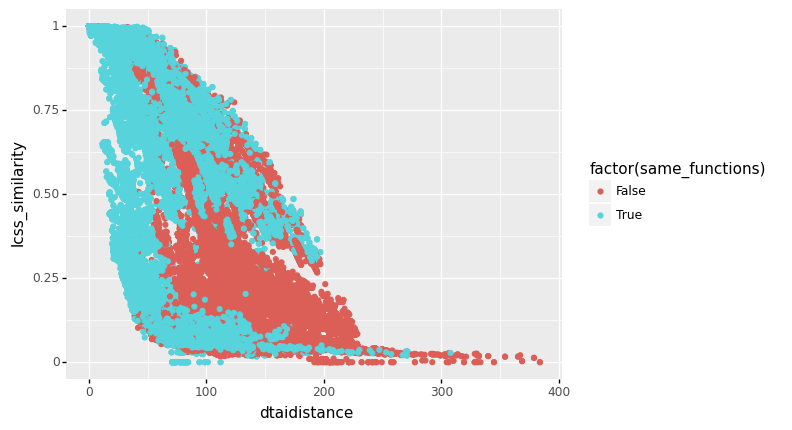

<ggplot: (116942610089)>

In [97]:
distance_df_cpu = distance_df[filterRAM]
p = ggplot(aes(x='dtaidistance', y='lcss_similarity'), distance_df_cpu)
p + geom_point(aes(color='factor(same_functions)'))

In [74]:
#only matching functions
distance_df_ram = distance_df[filterRAM & filterSame]
distance_df_ram[measures].describe()

,euclidean,dtw-python-distance,dtw-python-normalizedDistance,dtaidistance,lcss_similarity
count,22678.000000,22678.000000,22678.000000,22678.000000,22678.000000
mean,132.828004,1699.855017,1.033826,66.964732,0.548172
std,101.924987,1807.632928,0.610152,44.733640,0.321652
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.394100,313.187500,0.608171,31.972034,0.245098
50%,96.141441,858.130000,1.007408,54.217116,0.592471
75%,219.268471,2815.420000,1.378126,98.085791,0.827586
max,423.476622,13285.390000,5.127843,307.744074,1.000000


In [75]:
#only not matching functions
distance_df_ram = distance_df[filterRAM & filterDifferent]
distance_df_ram[measures].describe()

,euclidean,dtw-python-distance,dtw-python-normalizedDistance,dtaidistance,lcss_similarity
count,36750.000000,36750.000000,36750.000000,36750.000000,36750.000000
mean,267.641729,3767.563227,1.991018,122.243472,0.245012
std,83.715265,2113.239316,0.789698,41.121074,0.213113
min,6.173565,4.180000,0.003752,0.399124,0.000000
25%,214.934370,2293.377500,1.453050,97.140411,0.097701
50%,264.875839,3307.280000,1.941295,116.653691,0.175926
75%,327.507007,4839.402500,2.442463,144.968699,0.312333
max,474.142638,22240.180000,6.987867,383.800439,1.000000


In [87]:
#only same functions different size
distance_df_ram = distance_df[filterRAM & filterDifferentSize & filterSame]
distance_df_ram[measures].describe()

,euclidean,dtw-python-distance,dtw-python-normalizedDistance,dtaidistance,lcss_similarity
count,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000
mean,178.540203,2322.176497,1.267566,84.576385,0.453069
std,111.016609,2047.032954,0.559666,48.170366,0.279109
min,3.265746,2.370000,0.006850,0.307734,0.000000
25%,64.379105,462.350000,0.918148,38.940579,0.205607
50%,197.647890,2184.110000,1.289044,84.096823,0.477396
75%,272.636536,3640.490000,1.521225,120.298159,0.671569
max,423.476622,13285.390000,5.127843,307.744074,1.000000


In [86]:
#only same functions same size
distance_df_ram = distance_df[filterRAM & filterSameSize & filterSame]
distance_df_ram[measures].describe()

,euclidean,dtw-python-distance,dtw-python-normalizedDistance,dtaidistance,lcss_similarity
count,11517.000000,11517.000000,11517.000000,11517.000000,11517.000000
mean,88.528807,1096.770009,0.807310,49.897468,0.640335
std,67.273247,1278.456952,0.570340,33.165211,0.333131
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.513248,222.390000,0.390051,26.378990,0.323810
50%,69.693543,538.540000,0.765971,41.161081,0.757162
75%,131.635373,1529.830000,1.090953,71.043577,0.926966
max,319.068629,8885.820000,4.648407,230.172558,1.000000


Aggregation - Aggregation

In [52]:
#CPU
aggregation_with_aggregation = distance_df[filterCPU & filterAggregation1 & filterAggregation2]
aggregation_with_aggregation[measures].describe()

,euclidean,dtw-python-distance,dtw-python-normalizedDistance,dtaidistance,lcss_similarity
count,8836.000000,8836.000000,8836.000000,8836.000000,8836.000000
mean,869.282003,2411.635260,1.090978,186.448221,0.831251
std,225.903213,638.049343,0.363677,57.388347,0.042482
min,0.000000,0.000000,0.000000,0.000000,0.713178
25%,740.133888,1980.860000,0.840152,146.491757,0.806757
50%,839.888785,2313.200000,1.039866,180.425652,0.836820
75%,994.764327,2809.510000,1.294621,223.147892,0.859008
max,1680.613562,4877.520000,2.720000,418.397104,1.000000


In [56]:
#RAM
aggregation_with_aggregation = distance_df[filterRAM & filterAggregation1 & filterAggregation2]
aggregation_with_aggregation[measures].describe()

,euclidean,dtw-python-distance,dtw-python-normalizedDistance,dtaidistance,lcss_similarity
count,8836.000000,8836.000000,8836.000000,8836.000000,8836.000000
mean,202.258910,2991.511951,1.192453,95.679660,0.428101
std,99.739709,1899.609354,0.584117,43.868852,0.338295
min,0.000000,0.000000,0.000000,0.000000,0.017241
25%,124.553172,1516.850000,0.811421,65.484027,0.067425
50%,217.362351,2886.435000,1.231533,94.259751,0.442372
75%,279.555193,4059.950000,1.532884,125.874470,0.717874
max,423.476622,12214.800000,3.588915,235.709983,1.000000


Filtration - Filtration

In [54]:
#CPU
filtrationWithFiltration = distance_df[filterCPU & filterFiltration1 & filterFiltration2]
filtrationWithFiltration[measures].describe()

,euclidean,dtw-python-distance,dtw-python-normalizedDistance,dtaidistance,lcss_similarity
count,10101.000000,10101.000000,10101.000000,10101.000000,10101.000000
mean,427.265703,1416.340939,3.529557,153.992208,0.621890
std,268.495171,1588.707342,4.297805,194.079797,0.064046
min,0.000000,0.000000,0.000000,0.000000,0.441341
25%,245.269620,1063.580000,2.490918,98.535901,0.584270
50%,363.839533,1195.920000,2.928927,119.706547,0.617647
75%,557.675318,1346.060000,3.427784,156.781390,0.650980
max,1850.113407,13715.350000,39.631912,1585.985412,1.000000


In [58]:
#RAM
filtrationWithFiltration = distance_df[filterRAM & filterFiltration1 & filterFiltration2]
filtrationWithFiltration[measures].describe()

,euclidean,dtw-python-distance,dtw-python-normalizedDistance,dtaidistance,lcss_similarity
count,10101.000000,10101.000000,10101.000000,10101.000000,10101.000000
mean,56.889355,388.441271,0.882545,34.774275,0.650460
std,31.769498,284.860572,0.578324,16.597753,0.263072
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.312289,188.670000,0.510196,24.404139,0.433498
50%,51.560042,342.310000,0.830000,33.537709,0.710280
75%,78.061918,529.000000,1.194252,44.686726,0.859873
max,151.278193,3006.830000,5.127843,135.353332,1.000000


Aggregation - Filtration

In [55]:
#CPU
aggregationWithFiltration = distance_df[filterCPU & filterAggregation1 & filterFiltration2]
aggregationWithFiltration[measures].describe()

,euclidean,dtw-python-distance,dtw-python-normalizedDistance,dtaidistance,lcss_similarity
count,10998.000000,10998.000000,10998.000000,10998.000000,10998.000000
mean,891.651311,3808.576144,2.279959,389.677770,0.762543
std,217.175965,1430.970647,1.223443,155.192604,0.058844
min,451.026602,1875.930000,0.789269,151.738908,0.601083
25%,743.351199,3292.287500,1.478740,310.455563,0.716580
50%,849.801585,3666.480000,2.033580,382.552672,0.766712
75%,1000.554350,4070.427500,2.926895,448.243069,0.811332
max,2099.574980,19313.380000,17.799465,1819.645331,0.891795


In [59]:
#RAM
aggregationWithFiltration = distance_df[filterRAM & filterAggregation1 & filterFiltration2]
aggregationWithFiltration[measures].describe()

,euclidean,dtw-python-distance,dtw-python-normalizedDistance,dtaidistance,lcss_similarity
count,10998.000000,10998.000000,10998.000000,10998.000000,10998.000000
mean,290.235593,4110.806147,2.110338,127.684333,0.183356
std,76.299967,2269.273640,0.694361,41.928933,0.116199
min,130.442595,847.740000,0.765108,42.213319,0.000000
25%,227.754360,2448.252500,1.558499,99.616716,0.098575
50%,277.292660,3400.750000,2.010313,117.638278,0.154696
75%,353.521413,5275.122500,2.503136,158.149317,0.252768
max,474.142638,22240.180000,6.720827,383.800439,0.602273
